In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# dataset from https://www.kaggle.com/noaa/hurricane-database?select=atlantic.csv
atlantic = pd.read_csv('csv/storms_atlantic.csv')
pacific = pd.read_csv('csv/storms_pacific.csv')

In [3]:
atlantic.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
pacific.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [5]:
atlantic = atlantic[['ID','Name','Date','Maximum Wind']]
pacific = pacific[['ID','Name','Date','Maximum Wind']]

In [6]:
atlantic.head()

,ID,Name,Date,Maximum Wind
0,AL011851,UNNAMED,18510625,80
1,AL011851,UNNAMED,18510625,80
2,AL011851,UNNAMED,18510625,80
3,AL011851,UNNAMED,18510625,80
4,AL011851,UNNAMED,18510625,80


In [7]:
# we are only interested on the maximum wind generated by the storm

date = []
maximum_winds = []
storm_name = []

for name,group in atlantic.groupby('ID'):
    storm_maximum_wind = group['Maximum Wind'].max()
    storm = group[group['Maximum Wind']==storm_maximum_wind].iloc[0]
    date.append(storm['Date'])
    storm_name.append(storm['Name'])
    maximum_winds.append(storm['Maximum Wind'])


atlantic_storms = pd.DataFrame({'Date':date,'Name': storm_name,'Maximum Wind':maximum_winds})
atlantic_storms['location'] = 'Atlantic Ocean'

In [8]:
atlantic_storms.head()

,Date,Name,Maximum Wind,location
0,18510625,UNNAMED,80,Atlantic Ocean
1,18520824,UNNAMED,100,Atlantic Ocean
2,18530805,UNNAMED,50,Atlantic Ocean
3,18540625,UNNAMED,70,Atlantic Ocean
4,18550806,UNNAMED,90,Atlantic Ocean


In [9]:
atlantic_storms.shape

(1814, 4)

In [10]:
#set right format for date

atlantic_storms['Date'] = pd.to_datetime(atlantic_storms['Date'].map(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:]))

In [11]:
atlantic_storms.head()

,Date,Name,Maximum Wind,location
0,1851-06-25,UNNAMED,80,Atlantic Ocean
1,1852-08-24,UNNAMED,100,Atlantic Ocean
2,1853-08-05,UNNAMED,50,Atlantic Ocean
3,1854-06-25,UNNAMED,70,Atlantic Ocean
4,1855-08-06,UNNAMED,90,Atlantic Ocean


In [12]:
# we are only interested on the maximum wind generated by the storm

date = []
maximum_winds = []
storm_name = []

for name,group in pacific.groupby('ID'):
    storm_maximum_wind = group['Maximum Wind'].max()
    storm = group[group['Maximum Wind']==storm_maximum_wind].iloc[0]
    date.append(storm['Date'])
    storm_name.append(storm['Name'])
    maximum_winds.append(storm['Maximum Wind'])


pacific_storms = pd.DataFrame({'Date':date,'Name':storm_name,'Maximum Wind':maximum_winds})
pacific_storms['location'] = 'Pacific Ocean'

In [13]:
pacific_storms.head()

,Date,Name,Maximum Wind,location
0,19500816,HIKI,75,Pacific Ocean
1,19570912,DELLA,110,Pacific Ocean
2,19580807,UNNAMED,45,Pacific Ocean
3,19590803,DOT,130,Pacific Ocean
4,19630806,UNNAMED,45,Pacific Ocean


In [14]:
pacific_storms.shape

(1050, 4)

In [15]:
#set right format for date

pacific_storms['Date'] = pd.to_datetime(pacific_storms['Date'].map(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:]))

In [16]:
pacific_storms.head()

,Date,Name,Maximum Wind,location
0,1950-08-16,HIKI,75,Pacific Ocean
1,1957-09-12,DELLA,110,Pacific Ocean
2,1958-08-07,UNNAMED,45,Pacific Ocean
3,1959-08-03,DOT,130,Pacific Ocean
4,1963-08-06,UNNAMED,45,Pacific Ocean


In [17]:
# concatenate two dataframe

dataframe = atlantic_storms.append(pacific_storms,ignore_index=True).sort_values(by='Date')

In [18]:
dataframe.head(10)

,Date,Name,Maximum Wind,location
0,1851-06-25,UNNAMED,80,Atlantic Ocean
165,1851-07-05,UNNAMED,80,Atlantic Ocean
329,1851-07-10,UNNAMED,50,Atlantic Ocean
493,1851-08-23,UNNAMED,100,Atlantic Ocean
656,1851-09-13,UNNAMED,50,Atlantic Ocean
812,1851-10-17,UNNAMED,60,Atlantic Ocean
1,1852-08-24,UNNAMED,100,Atlantic Ocean
166,1852-09-05,UNNAMED,70,Atlantic Ocean
330,1852-09-09,UNNAMED,70,Atlantic Ocean
494,1852-09-25,UNNAMED,80,Atlantic Ocean


In [19]:
# plot average storm winds from atlantic and pacific

atlantic_average_wind = atlantic_storms['Maximum Wind'].mean()
pacific_average_wind = pacific_storms['Maximum Wind'].mean()

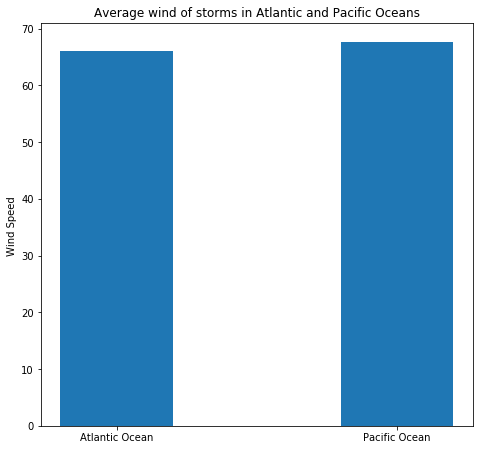

In [20]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.0,1.4])
ax.bar(dataframe.location.unique(),[atlantic_average_wind,pacific_average_wind],width=0.4)
ax.set_title('Average wind of storms in Atlantic and Pacific Oceans')
ax.set_ylabel('Wind Speed ')
plt.show()

In [21]:
pacific_top5 = pacific_storms.sort_values(by='Maximum Wind',ascending=False).head()
atlantic_top5 = atlantic_storms.sort_values(by='Maximum Wind',ascending=False).head()

In [22]:
strongest_storms = pacific_top5.append(atlantic_top5,ignore_index=True).sort_values(by='Maximum Wind')
strongest_storms

,Date,Name,Maximum Wind,location
4,1994-08-23,JOHN,150,Pacific Ocean
3,2009-10-18,RICK,155,Pacific Ocean
9,1998-10-26,MITCH,155,Atlantic Ocean
1,1997-12-18,PAKA,160,Pacific Ocean
2,1997-09-12,LINDA,160,Pacific Ocean
6,2005-10-19,WILMA,160,Atlantic Ocean
7,1988-09-14,GILBERT,160,Atlantic Ocean
8,1935-09-03,UNNAMED,160,Atlantic Ocean
5,1980-08-07,ALLEN,165,Atlantic Ocean
0,2015-10-23,PATRICIA,185,Pacific Ocean


In [23]:
# format name with date and location for chart names
strongest_labels = strongest_storms.apply(lambda x: f'{x.Name} ({str(x.Date)[:4]}) {x.location}' ,axis=1)

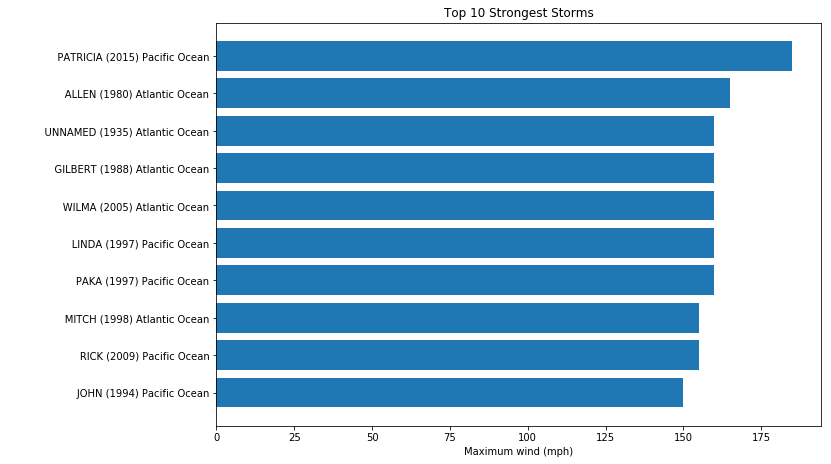

In [24]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.4,1.4])
ax.barh(strongest_labels,strongest_storms['Maximum Wind'])
ax.set_title('Top 10 Strongest Storms')
ax.set_xlabel('Maximum wind (mph)')
plt.show()

In [25]:
dataframe = dataframe.set_index('Date').resample('A').count()['location']
dataframe.head()

Date
1851-12-31    6
1852-12-31    5
1853-12-31    8
1854-12-31    5
1855-12-31    5
Freq: A-DEC, Name: location, dtype: int64

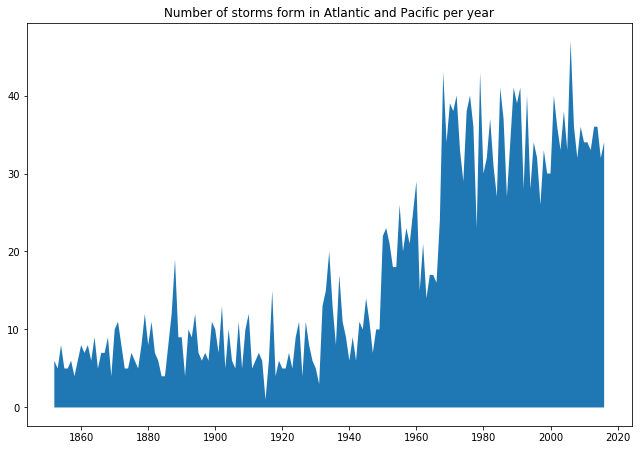

In [26]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.4,1.4])
ax.stackplot(dataframe.index,dataframe)
ax.set_title('Number of storms form in Atlantic and Pacific per year')
plt.show()